




# Power Production Project
***

#### Project Question
***

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.

To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.

#### Project Analysis
***

As part of this project we were tasked with reviewing and analysing a data set for speed and power, using this data set we then were asked to train a model to predict the power output after a user inputs a wind speed. The final task was to output this on a user interface using a python package Flask.

This Jupyter notebook will review all the above tasks. Initially we will review the data, train three models and review their benefits and finally pick the best fit to complete the Flask task.

We start analysing the data by importing a number of packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We can then import the CSV file as a dataframe in pandas and output the top 20 rows to begin to gain a perspective on the data.

In [2]:
df = pd.read_csv (r'powerproduction.csv')
df.head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


The next number of checks is to review data types and to see if there is any blanks.

In [3]:
df.dtypes

speed    float64
power    float64
dtype: object

In [4]:
df.isnull().values.any()

False

The next method we can call on the dataframe is to "describe()" which gives more of an insight into the data set.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,500.0,12.590398,7.224991,0.0,6.32475,12.5505,18.77525,25.000
power,500.0,48.014584,41.614572,0.0,5.28800,41.6455,93.53700,113.556


Individually, all the above steps help in understanding the data however after reviewing all steps together we can make a number of assumptions. The data set contains two number columns "speed" and "power". Both columns are made up of datapoints of floating point numbers and we have no null values (blank cells). 500 samples with a mean wind speed value of 12.59 m/s and a mean power output 48.01 w. 

As we can see from the df.head(20) method above - there are a number of Zero power output from a non-zero wind speed. These errors may be down to a number of factors, however we must remove these outliers from our model as we require an ideal output.

We can now split the dataframe into Zero and non-Zero output.

In [6]:
#df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)
df_remove_power_Zero =  df[df.power != 0]
df_all_zero_power = df[df.power ==0]
df_remove_power_Zero.head(20)

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


We can now review the impact the outliers have on the dataframe. There were 49 Zero power-out outliers. The Mean for both the speed and power has increased, which is to be expected, to 13m/s and 53.23w respectively.

In [7]:
df_remove_power_Zero.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
speed,451.0,13.004302,6.835979,0.325,7.3445,13.038,18.7815,24.399
power,451.0,53.231246,40.522055,0.067,8.5435,58.168,94.7255,113.556


At this point, plotting the data will give a further understanding of how the data is behaving. From the graph below, we can see as the wind speed increases so does the power output. The wind speed from 0-10 m/s has a relatively low power output. From a wind speed of 10-20 has a significant power output increase, as we increment up through the datapoints. From 20-25m/s wind speed we have a similar plateau in power output as in the earlier 0-10m/s.

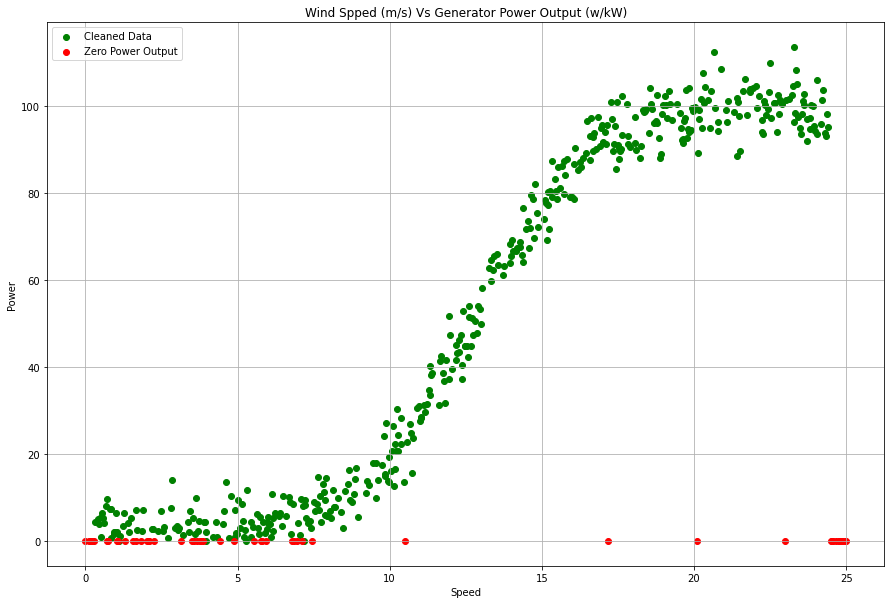

In [8]:
plt.figure(figsize=(15,10))
plt.scatter(df_remove_power_Zero['speed'],df_remove_power_Zero['power'],color='green', label="Cleaned Data")
plt.scatter(df_all_zero_power['speed'],df_all_zero_power['power'],color='red', label="Zero Power Output")
plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Having reviewed the data we can now review the relationships it follows using the following machine learning models: 
1. Linear Regression
2. k Nearest Neighbour
3. Neural Network

We can now import all the relevant packages to produce these models.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
from tensorflow import keras

Using the above dataframe we can now split the data into X and Y values - Speed and Power

In [10]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

We must reshape the data to preprocess it for the models.

In [11]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

We can now split the data into the train and validation for speed and power, X and Y. 80% of the data is used for training the models while the remaining 20% is used to validate or evaluate the model.

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.20, random_state=7)

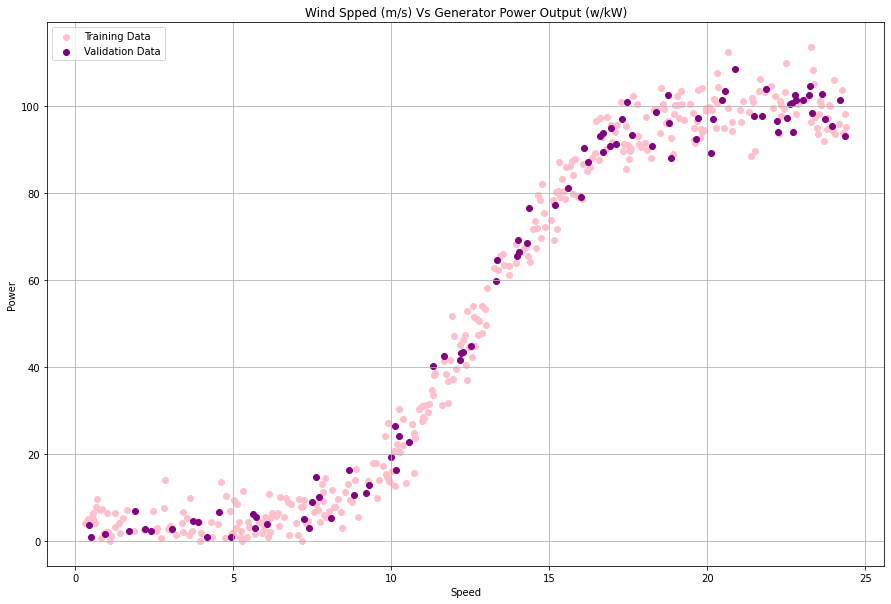

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(X_train,Y_train,color='pink', label="Training Data")
plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Linear Regression
***

Using the Linear regression model we are implying there is a linear relationship observed with the data - in a straight line. As the speed increases the Power output will also increase. If we look at the graph below we assume the datapoints are listed along the straight line.

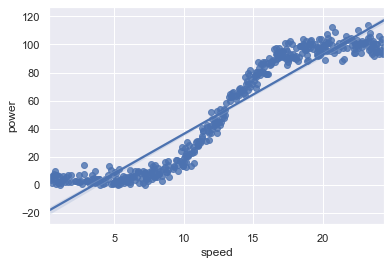

In [14]:
sns.set_theme(color_codes=True)
sns.regplot(x="speed", y="power", data=df_remove_power_Zero);

We can now train the linear regression model with the training data.

In [15]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)

Using the model we can attempt to predict the power output at wind speed 15m/s.

In [16]:
lin_reg_model.predict(np.array([[15]]))[0]

64.56508418925088

We can now evaluate the model on a granular level - we know the input and the actual output, in the code below we can iterate through the 20% training dataset and view the percentage difference between predicted and actual values.

In [17]:
Y_pred = lin_reg_model.predict(X_validation)
for i in range(0,len(Y_pred)):
    a = X_validation[i]
    b = round(Y_pred[i],3)
    c = round(Y_validation[i],3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:39.465, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: 73.412%

Wind Speed: [22.723]
PREDICTED VALUE:108.234, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 15.187%

Wind Speed: [24.349]
PREDICTED VALUE:117.428, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 26.161%

Wind Speed: [22.523]
PREDICTED VALUE:107.103, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 10.125%

Wind Speed: [9.309]
PREDICTED VALUE:32.386, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 151.425%

Wind Speed: [20.17]
PREDICTED VALUE:93.798, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: -3.264%

Wind Speed: [5.681]
PREDICTED VALUE:11.872, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 291.041%

Wind Speed: [10.11]
PREDICTED VALUE:36.915, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: 39.687%

Wind Speed: [20.571]
PREDICTED VALUE:96.066, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -7.097%

Wind Speed: [14.364]
PREDICTED VALUE:60.969, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -20.355%

Wind Speed: [23.248]
PREDICT

If we review the above data comparison output, along with the graph above, we see that as the actual data crosses the regression line the values appear to have a reduced percentage difference. The datapoints at 7.5m/s and circa 17m/s have the greatest percentage difference, as the real data is furthest from these points. This percentage difference is how near the datapoints are to the above regression line. The linear regression has a built-in method of score to view this difference also known as R^2. Below is an example of the r value of the model:

In [18]:
r = lin_reg_model.score(X_validation, Y_validation)
print(r)

0.9038134283916828


The nearer the value is to one the better the fit of the model. We can now plot the 20% validation data versus the predicted data for review.

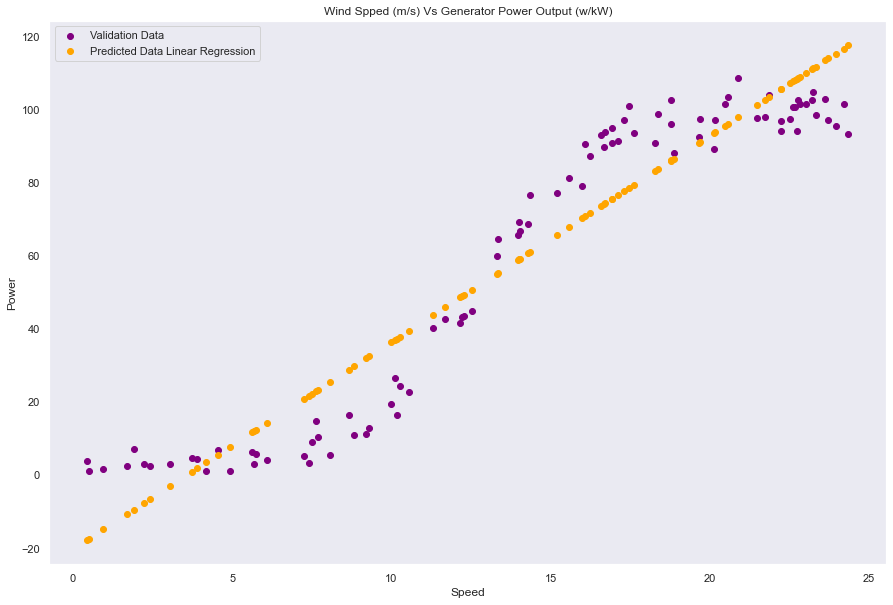

In [19]:
plt.figure(figsize=(15,10))


plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,Y_pred,color='orange', label="Predicted Data Linear Regression")

plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

k Nearest Neighbours
***

k Nearest Neighbour (kNN) is based on the average of the k nearest neighbours. The model identifies the other data points near the defined input and returns an average of the desired output, in this case Power output. Below is an example of the kNN model. If we choose the green point in the centre this is our desired node and the k value is the predetermined average number of samples.

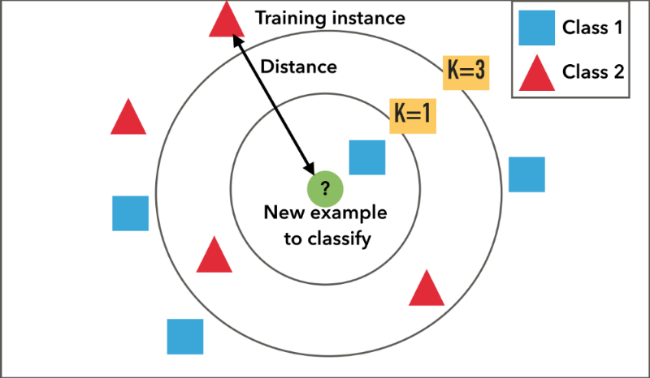

The above image was taken from https://medium.com/@sonish.sivarajkumar/k-nearest-neighbours-knn-algorithm-9900c1427726

We train the model with the train data (80%) and a k value of 5, this is the average of the five nearest datapoints.

In [20]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)

As for the linear regression model, we can now use the model to predict the value of power output for the wind speed of 15m/s.

In [21]:
knn.predict(np.array([[15]]))[0]

75.5042

Using the same approach, we can now review the predicted value for power output versus the actual value, from the dataset.

In [22]:
Y_knn_pred = knn.predict(X_validation)
for i in range(0,len(Y_knn_pred)):
    a = X_validation[i]
    b = round(Y_knn_pred[i].item(0),3)
    c = round(Y_validation[i].item(0),3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:20.649, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: -9.267%

Wind Speed: [22.723]
PREDICTED VALUE:102.242, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 8.81%

Wind Speed: [24.349]
PREDICTED VALUE:97.321, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 4.559%

Wind Speed: [22.523]
PREDICTED VALUE:102.121, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 5.002%

Wind Speed: [9.309]
PREDICTED VALUE:14.764, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 14.618%

Wind Speed: [20.17]
PREDICTED VALUE:100.566, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: 3.716%

Wind Speed: [5.681]
PREDICTED VALUE:3.097, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 2.009%

Wind Speed: [10.11]
PREDICTED VALUE:18.496, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: -30.011%

Wind Speed: [20.571]
PREDICTED VALUE:99.487, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -3.789%

Wind Speed: [14.364]
PREDICTED VALUE:67.28, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -12.111%

Wind Speed: [23.248]
PREDICTED VALUE:

In general, we can see the model has a higher level of accuracy in predicting the power output. The predicted value and the actual value have a much smaller percentage difference between one another. The below graph illustrates the actual data versus the predicted data for the kNN model. We can now use the model.score method to determine the "accuracy" or the distances, the predicted points are away from the actual points.

In [23]:
k = knn.score(X_validation, Y_validation)
print(k)

0.9904822357829398


After reviewing the above graph we can see that the data plot of both data sets follow the same pattern.

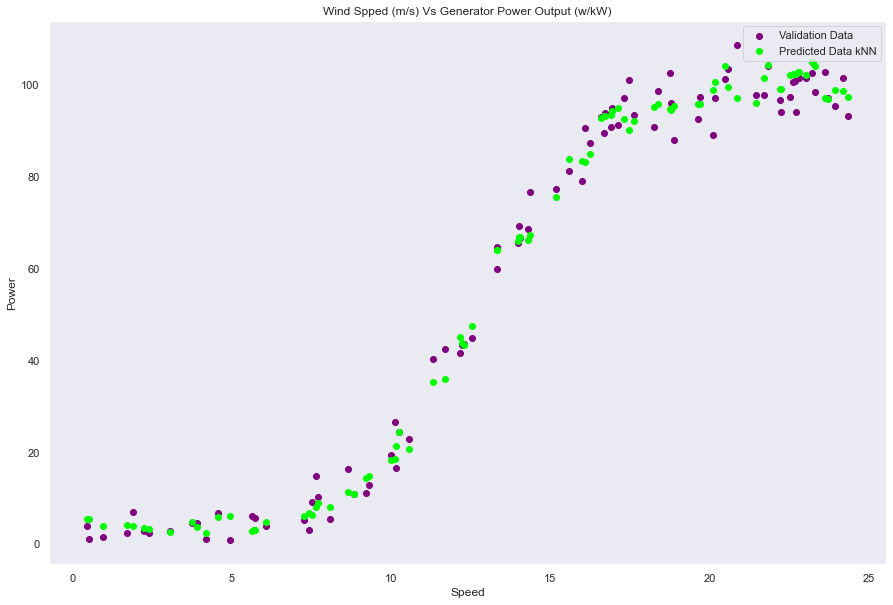

In [24]:
plt.figure(figsize=(15,10))


plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,Y_knn_pred,color='lime', label="Predicted Data kNN")

plt.title("Wind Spped (m/s) Vs Generator Power Output (w/kW)")
plt.xlabel("Speed")
plt.ylabel("Power")
plt.legend()
plt.grid()
plt.show()

Neural Networks
***

A neural network is defined by IBM as - "Neural networks reflect the behavior of the human brain, allowing computer programs to recognize patterns and solve common problems in the fields of AI, machine learning, and deep learning." The below image is a graphical representation of the building blocks of a neural network. The process works much like that of the human mind. There are x number of inputs and y number of outputs, depending on the complexity of the network.

Each model is made up of an input layer, one or multiple hidden layers and finally the output layer. The hidden layer is where the processes are performed on the data. There are a large number or factors, that affect the hidden layer some of which include:
1. Neuron - the neuron is shown below as a blue ball, receives an input carries out a process and then returns an output.
2. Weights - as the input enters the neuron it is acted on by the weight, the weight determines the level of importance on an input. 
3. Bias - where the expected value differs underlying data the bias acts to correct that.
4. Activation Function - is the pattern the neural network should follow and if the input should be included based on a number of factors.

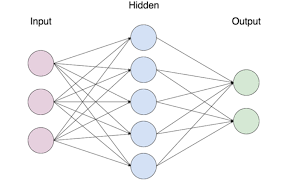

The above image was taken from the following link https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e

After the earlier analysis of the data, there is a case for Sigmoid & tanh activation function. For this exercise I chose tanh shown on the graph below.

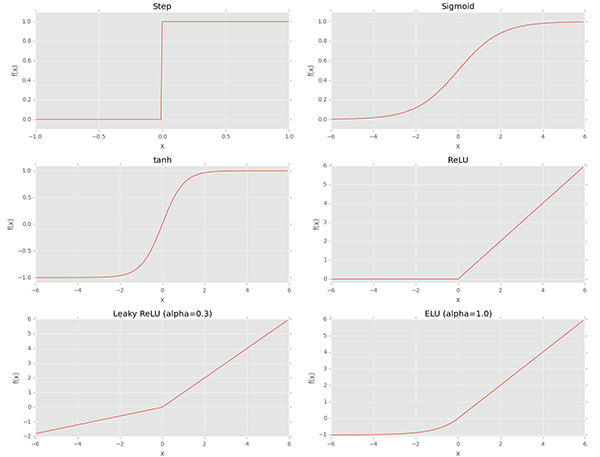

Source for the image: https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

We can now set up the neural network using the below piece of code. We chose to use a sequential model with one input and one output. The model contains five layers, the input, tanh with 30 nodes, sigmoid with 30 nodes, linear with one node and the output layer. The model is then compiled using 'adam' and a loss of mean squared error.

In [27]:
#https://keras.io/guides/sequential_model/
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_shape=(1,), activation="tanh"))
model.add(keras.layers.Dense(30, input_shape=(1,), activation="sigmoid"))
model.add(keras.layers.Dense(1, input_shape=(1,), activation="linear"))
#model.add(keras.layers.Dense(1, output_shape=(1,)))
model.compile('adam',loss='mean_squared_error')

Below is a summary of the model. The second layer of linear activation was to ensure one output for every one input.

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 1,021
Trainable params: 1,021
Non-trainable params: 0
_________________________________________________________________


As with the previous models, we can now train the model with model.fit of the training data. The below epoch is the number a times the data is fed through the model to increase the model accuracy.

In [29]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
12/12 [==============================] - 1s 1ms/step - loss: 4328.0823
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 4294.7686
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 4149.4932
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 4013.6442
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 3980.8275
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 4114.0945
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 3831.1452
Epoch 8/500
12/12 [==============================] - 0s 2ms/step - loss: 3900.7181
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 3955.1301
Epoch 10/500
12/12 [==============================] - 0s 2ms/step - loss: 3702.9256
Epoch 11/500
12/12 [==============================] - 0s 2ms/step - loss: 3394.2771
Epoch 12/500
12/12 [==============================] - 0s 2ms/step - loss: 3701.4876
E

12/12 [==============================] - 0s 2ms/step - loss: 1966.5924
Epoch 99/500
12/12 [==============================] - 0s 2ms/step - loss: 1995.1350
Epoch 100/500
12/12 [==============================] - 0s 1ms/step - loss: 2039.8986
Epoch 101/500
12/12 [==============================] - 0s 2ms/step - loss: 2121.2747
Epoch 102/500
12/12 [==============================] - 0s 2ms/step - loss: 1825.8158
Epoch 103/500
12/12 [==============================] - 0s 1ms/step - loss: 2003.8961
Epoch 104/500
12/12 [==============================] - 0s 1ms/step - loss: 1823.3569
Epoch 105/500
12/12 [==============================] - 0s 1ms/step - loss: 1879.1941
Epoch 106/500
12/12 [==============================] - 0s 2ms/step - loss: 1804.3279
Epoch 107/500
12/12 [==============================] - 0s 1ms/step - loss: 1988.0188
Epoch 108/500
12/12 [==============================] - 0s 1ms/step - loss: 1930.7977
Epoch 109/500
12/12 [==============================] - 0s 2ms/step - loss: 1894.

12/12 [==============================] - 0s 2ms/step - loss: 672.8330
Epoch 195/500
12/12 [==============================] - 0s 1ms/step - loss: 653.7765
Epoch 196/500
12/12 [==============================] - 0s 2ms/step - loss: 594.2867
Epoch 197/500
12/12 [==============================] - 0s 1ms/step - loss: 679.0623
Epoch 198/500
12/12 [==============================] - 0s 1ms/step - loss: 654.9548
Epoch 199/500
12/12 [==============================] - 0s 1ms/step - loss: 612.6319
Epoch 200/500
12/12 [==============================] - 0s 2ms/step - loss: 593.7971
Epoch 201/500
12/12 [==============================] - 0s 1ms/step - loss: 638.5070
Epoch 202/500
12/12 [==============================] - 0s 2ms/step - loss: 553.2411
Epoch 203/500
12/12 [==============================] - 0s 2ms/step - loss: 609.2886
Epoch 204/500
12/12 [==============================] - 0s 2ms/step - loss: 623.9064
Epoch 205/500
12/12 [==============================] - 0s 2ms/step - loss: 547.5663
Epoch 

12/12 [==============================] - 0s 2ms/step - loss: 127.8611
Epoch 292/500
12/12 [==============================] - 0s 2ms/step - loss: 116.9232
Epoch 293/500
12/12 [==============================] - 0s 1ms/step - loss: 124.4795
Epoch 294/500
12/12 [==============================] - 0s 1ms/step - loss: 122.7772
Epoch 295/500
12/12 [==============================] - 0s 2ms/step - loss: 126.1130
Epoch 296/500
12/12 [==============================] - 0s 2ms/step - loss: 124.4366
Epoch 297/500
12/12 [==============================] - 0s 1ms/step - loss: 112.6678
Epoch 298/500
12/12 [==============================] - 0s 1ms/step - loss: 97.3991
Epoch 299/500
12/12 [==============================] - 0s 1ms/step - loss: 113.3498
Epoch 300/500
12/12 [==============================] - 0s 2ms/step - loss: 110.4893
Epoch 301/500
12/12 [==============================] - 0s 2ms/step - loss: 115.7972
Epoch 302/500
12/12 [==============================] - 0s 2ms/step - loss: 104.1135
Epoch 3

12/12 [==============================] - 0s 1ms/step - loss: 30.9371
Epoch 390/500
12/12 [==============================] - 0s 2ms/step - loss: 31.1928
Epoch 391/500
12/12 [==============================] - 0s 1ms/step - loss: 34.1523
Epoch 392/500
12/12 [==============================] - 0s 1ms/step - loss: 29.5973
Epoch 393/500
12/12 [==============================] - 0s 1ms/step - loss: 28.5978
Epoch 394/500
12/12 [==============================] - 0s 1ms/step - loss: 29.8851
Epoch 395/500
12/12 [==============================] - 0s 2ms/step - loss: 29.3674
Epoch 396/500
12/12 [==============================] - 0s 2ms/step - loss: 26.8520
Epoch 397/500
12/12 [==============================] - 0s 1ms/step - loss: 30.1860
Epoch 398/500
12/12 [==============================] - 0s 2ms/step - loss: 22.6737
Epoch 399/500
12/12 [==============================] - 0s 2ms/step - loss: 29.6764
Epoch 400/500
12/12 [==============================] - 0s 2ms/step - loss: 28.2212
Epoch 401/500
12/1

12/12 [==============================] - 0s 1ms/step - loss: 19.6520
Epoch 488/500
12/12 [==============================] - 0s 2ms/step - loss: 16.9086
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 18.2032
Epoch 490/500
12/12 [==============================] - 0s 1ms/step - loss: 19.6777
Epoch 491/500
12/12 [==============================] - 0s 1ms/step - loss: 17.5708
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 18.3917
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 17.6297
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 17.2011
Epoch 495/500
12/12 [==============================] - 0s 2ms/step - loss: 19.5437
Epoch 496/500
12/12 [==============================] - 0s 2ms/step - loss: 18.7522
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 19.4747
Epoch 498/500
12/12 [==============================] - 0s 2ms/step - loss: 19.9969
Epoch 499/500
12/1

In [30]:
pred = model.predict(X_validation)

For each model we have attempted to predict the power output at a wind speed of 15m/s. The below is the prediction for the neural network.

In [31]:
model.predict([15])[0]

array([76.191475], dtype=float32)

In [32]:
Y_pred = model.predict(X_validation)
for i in range(0,len(Y_pred)):
    a = X_validation[i].item(0)
    b = round(Y_pred[i].item(0),3)
    c = round(Y_validation[i],3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: 10.561
PREDICTED VALUE:23.822, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: 4.675%

Wind Speed: 22.723000000000003
PREDICTED VALUE:97.6, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 3.87%

Wind Speed: 24.349
PREDICTED VALUE:97.607, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 4.866%

Wind Speed: 22.523000000000003
PREDICTED VALUE:97.598, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 0.352%

Wind Speed: 9.309
PREDICTED VALUE:13.488, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 4.712%

Wind Speed: 20.17
PREDICTED VALUE:97.516, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: 0.57%

Wind Speed: 5.681
PREDICTED VALUE:5.166, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 70.158%

Wind Speed: 10.11
PREDICTED VALUE:19.458, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: -26.371%

Wind Speed: 20.570999999999998
PREDICTED VALUE:97.547, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -5.665%

Wind Speed: 14.364
PREDICTED VALUE:69.915, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -8.669%

Wind Speed: 23.248
PREDICTED

We can now plot the validation data aganst the neural network predicted data.

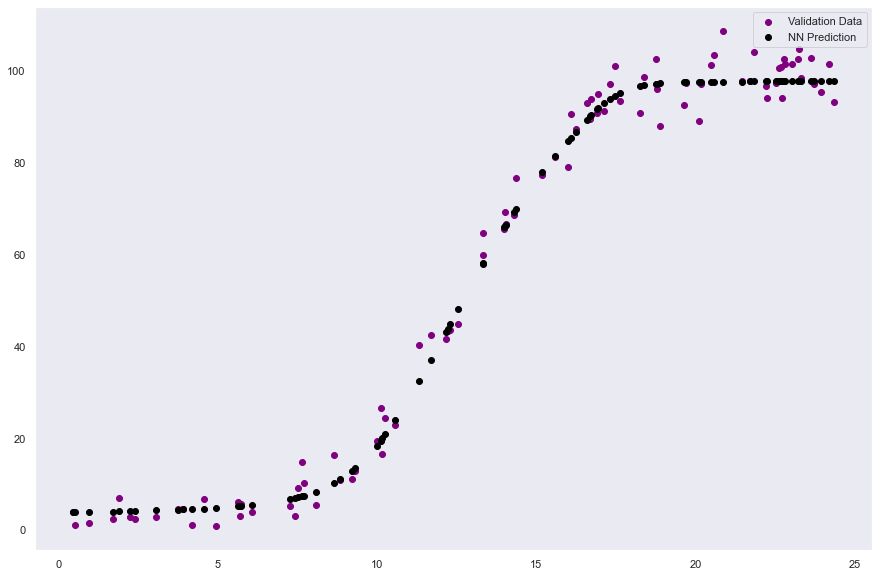

In [33]:
plt.figure(figsize=(15,10))

plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,model.predict(X_validation), color='black', label='NN Prediction')


plt.grid()
plt.legend()

As part of the project we were to deploy the model in production. The below can export the model to enable it to be used as part of the Flask application.

In [34]:
model.save("powerpred.h5")

# Conclusion
***

In conclusion, we used three different machine learning models to determine the power output of a wind turbine with different wind speeds based on an existing dataset. 

Firstly as part of the project we evaluated the 500 datapoint data set and removed all the zero outliers. The next exercise was to randomly split the data 80-20, to train and evaluate the model. Each model was trained and compared against the 20% validation data set. With the data set all values for power output were predicted. 

Each model provided varying levels of predictive accuracy.

The first model linear regression assumed a linear type relationship with the data.
The second model kNN used an average of the 5 nearest data points and used an average to predict the power output.
The final model used a keras neural network - three hidden layers of tanh,sigmoid and linear activation to determine the power output with a given wind speed.

The below graph demonstrates the three models plotted alongside the Validation or objective data.

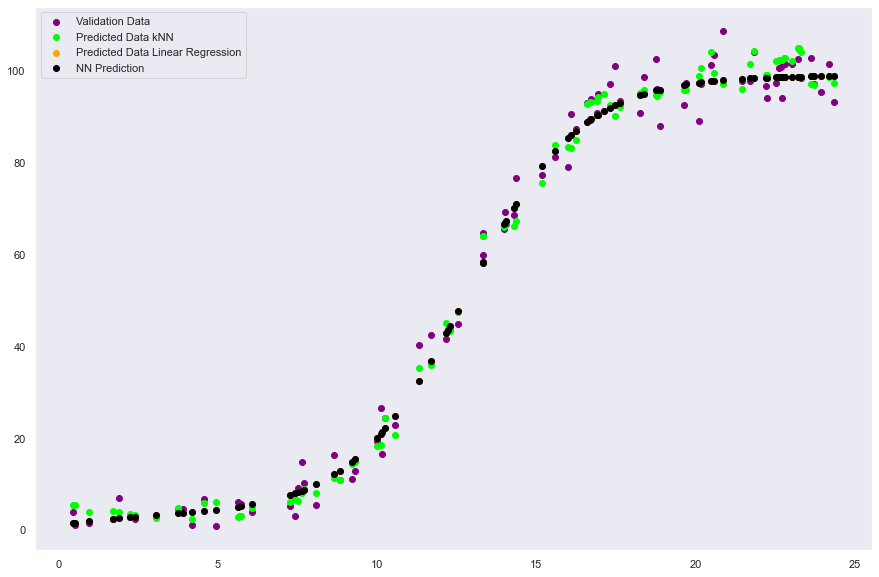

In [35]:
plt.figure(figsize=(15,10))

plt.scatter(X_validation,Y_validation,color='purple', label="Validation Data")
plt.scatter(X_validation,Y_knn_pred,color='lime', label="Predicted Data kNN")
plt.scatter(X_validation,Y_pred,color='orange', label="Predicted Data Linear Regression")
plt.scatter(X_validation,model.predict(X_validation), color='black', label='NN Prediction')

plt.grid()
plt.legend()

# References
***

1. https://medium.com/@luwei.io/logistic-regression-with-keras-d75d640d175e
2. https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/
3. https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789132212/1/ch01lvl1sec15/logistic-regression-with-keras
4. https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
5. https://tomroth.com.au/keras/
6. https://curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/
7. https://towardsdatascience.com/deploying-keras-deep-learning-models-with-flask-5da4181436a2
8. https://medium.com/datadriveninvestor/flask-api-for-keras-87c06da174e8
9. https://www.duo.uio.no/bitstream/handle/10852/57735/Master_Thesis_Finn_Erik_20170525_FINAL.pdf?isAllowed=y&sequence=7
10. https://towardsdatascience.com/step-by-step-guide-to-building-your-own-neural-network-from-scratch-df64b1c5ab6e
11. https://www.ibm.com/cloud/learn/neural-networks